In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_movies.csv')
df

,actor/actress,category,type,title,year,duration,genres,rating,votes
0,Fred Astaire,actor,movie,The Gay Divorcee,1934,107,"Comedy,Musical,Romance",7.4,8322
1,Ginger Rogers,actress,movie,The Gay Divorcee,1934,107,"Comedy,Musical,Romance",7.4,8322
2,Edward Everett Horton,actor,movie,The Gay Divorcee,1934,107,"Comedy,Musical,Romance",7.4,8322
3,Alice Brady,actress,movie,The Gay Divorcee,1934,107,"Comedy,Musical,Romance",7.4,8322
4,Fred Astaire,actor,movie,Roberta,1935,106,"Comedy,Musical,Romance",7.0,3560
...,...,...,...,...,...,...,...,...,...
6075698,Gaia Delepine,actress,short,Entre Deux Stations,2017,5,Short,8.9,13
6075699,Alejandro Bordier,actor,short,Entre Deux Stations,2017,5,Short,8.9,13
6075700,James Craigmyle,self,tvEpisode,Top 10 K9 Moments,2019,\N,"Crime,Reality-TV",7.5,9
6075701,James Craigmyle,self,tvEpisode,Raising the Woof,2020,41,Reality-TV,8.4,16


In [3]:
#Encoding genres
df_genres = df['genres'].str.get_dummies(',')

In [4]:
#Normalizing ratings
scaler = MinMaxScaler()
df['rating'] = scaler.fit_transform(df[['rating']])

In [5]:
#Merging both
newdf = pd.concat([df_genres, df['rating']], axis=1)

In [6]:
#Sum of squared distances as per theory
ssd = []
K = range(1, 15)

for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(newdf)
    ssd.append(model.inertia_)

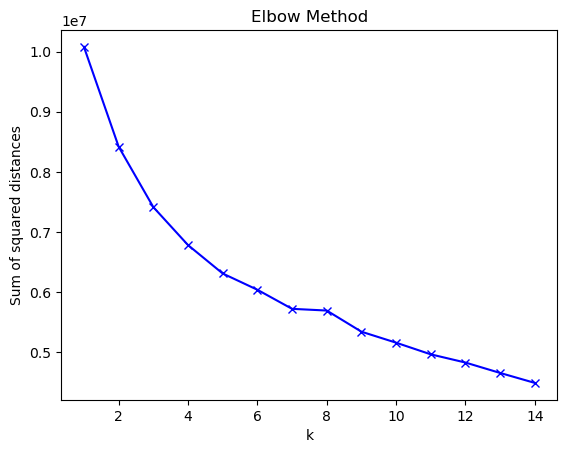

In [7]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

In [9]:
true_k = 6  
model = KMeans(n_clusters=true_k)
model.fit(newdf)

KMeans(n_clusters=6)

In [10]:
#new column 'cluster' for the clusters of each movie
df['cluster'] = model.labels_

In [11]:
#Creating the function
def recommend_movies(movie_name):
    cluster_number = df[df['title'] == movie_name]['cluster'].values[0] 
    return df[df['cluster'] == cluster_number]['title']

In [12]:
recommendations = recommend_movies("Jurassic Park")
print(recommendations)

177              It Takes a Thief
178              It Takes a Thief
179              It Takes a Thief
180              It Takes a Thief
181              It Takes a Thief
                    ...          
6075622      Spider-Man: The Hunt
6075623      Spider-Man: The Hunt
6075637       Super Mario Bros. Z
6075638       Super Mario Bros. Z
6075657    Still Life with Cookie
Name: title, Length: 597451, dtype: object


In [13]:
#Getting rid of the duplicates
def recommend_movies(movie_name):
    cluster_number = df[df['title'] == movie_name]['cluster'].values[0] 
    return df[df['cluster'] == cluster_number]['title'].drop_duplicates()

In [14]:
recommendations = recommend_movies("Spider-Man: The Hunt")
print(recommendations)

177                          It Takes a Thief
203             Santa Claus Is Comin' to Town
236        The Easter Bunny Is Comin' to Town
609            An Evening with Alistair Mundy
613                    The Great Casino Caper
                          ...                
6075593                        Mob 1 ~Moving~
6075621              Farrah Rogue - Awakening
6075622                  Spider-Man: The Hunt
6075637                   Super Mario Bros. Z
6075657                Still Life with Cookie
Name: title, Length: 104166, dtype: object
